In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const
from scipy.special import gamma

In [2]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)
    return s

---

# Zu Aufgabe 1

In [3]:
#Messwerte:
a1_Ue_dc = np.array([-0.25,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.25]) #V
a1_dUe_dc = np.full(9, 0.005)

a1_Ua_dc_48 = np.array([4.8,3.1,2.3,1.5,0.7,-0.1,-1,-1.7,-3.4]) #V
a1_dUa_dc_48 = np.full(9, 0.2)

a1_Ua_dc_274 = np.array([14.7,14.7,10.6,6,1.4,-3.2,-7.8,-12,-12.2]) #V
a1_dUa_dc_274 = np.full(9, 0.2)

a1_Ug_ac = np.array([0.05,0.2,0.4,0.6,0.8,1]) * 1/10 #Vss
a1_dUg_ac = np.append(np.full(5, 0.05), 0.5) * 1/10

a1_Ua_ac_274 = np.array([0.430,1.76,3.46,5.24,7.02,8.3]) #Vss
a1_dUa_ac_274 = np.append(np.full(5,0.02), 0.2)

a1_Ua_ac_680 = np.array([1.06,4.34,7.80,12.2,16.8,20.8]) #Vss
a1_dUa_ac_680 = np.concatenate([np.full(3,0.02), np.full(3,0.2)])

In [4]:
def linfit(x,a,b):
    return a*x+b

In [5]:
a1_popt_dc_48, a1_pcov_dc_48 = curve_fit(linfit, a1_Ue_dc, a1_Ua_dc_48, sigma=a1_dUa_dc_48, absolute_sigma=True)
a1_popt_dc_274, a1_pcov_dc_274 = curve_fit(linfit, a1_Ue_dc[1:-1], a1_Ua_dc_274[1:-1], sigma=a1_dUa_dc_274[1:-1], absolute_sigma=True)
a1_popt_ac_274, a1_pcov_ac_274 = curve_fit(linfit, a1_Ug_ac, a1_Ua_ac_274, sigma=a1_dUa_ac_274, absolute_sigma=True)
a1_popt_ac_680, a1_pcov_ac_680 = curve_fit(linfit, a1_Ug_ac, a1_Ua_ac_680, sigma=a1_dUa_ac_680, absolute_sigma=True)

print(r"Fitgerade DC (R=48,7kohm): y = ({} +/- {}) * x + ({} +/- {})".format(a1_popt_dc_48[0], np.sqrt(a1_pcov_dc_48[0][0]), a1_popt_dc_48[1], np.sqrt(a1_pcov_dc_48[1][1])))
print(r"Fitgerade DC (R=274kohm): y = ({} +/- {}) * x + ({} +/- {})".format(a1_popt_dc_274[0], np.sqrt(a1_pcov_dc_274[0][0]), a1_popt_dc_274[1], np.sqrt(a1_pcov_dc_274[1][1])))
print(r"Fitgerade AC (R=274kohm): y = ({} +/- {}) * x + ({} +/- {})".format(a1_popt_ac_274[0], np.sqrt(a1_pcov_ac_274[0][0]), a1_popt_ac_274[1], np.sqrt(a1_pcov_ac_274[1][1])))
print(r"Fitgerade AC (R=680kohm): y = ({} +/- {}) * x + ({} +/- {})".format(a1_popt_ac_680[0], np.sqrt(a1_pcov_ac_680[0][0]), a1_popt_ac_680[1], np.sqrt(a1_pcov_ac_680[1][1])))

Fitgerade DC (R=48,7kohm): y = (-16.307692308335117 +/- 0.452910817190047) * x + (0.68888888863006 +/- 0.0666666664251726)
Fitgerade DC (R=274kohm): y = (-90.07142856535128 +/- 0.7559289480227102) * x + (1.3857142857142852 +/- 0.07559289423045314)
Fitgerade AC (R=274kohm): y = (87.61718257602269 +/- 0.3308273088193697) * x + (-0.011205527831437976 +/- 0.016275094137040362)
Fitgerade AC (R=680kohm): y = (194.22762268436355 +/- 0.7424029428459205) * x + (0.20034925117950003 +/- 0.02011793388176103)


chi2 = 0.2606837606837605
chi2_red = 0.03724053724053721
Wahrscheinlichkeit = 100.0 %


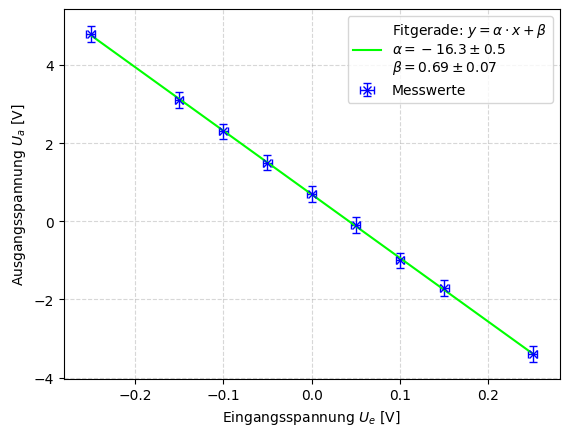

In [6]:
X = np.linspace(-0.25,0.25,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a1_Ue_dc, a1_Ua_dc_48, yerr=a1_dUa_dc_48, xerr=a1_dUe_dc, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Eingangsspannung $U_e$ [V]')
plt.ylabel(r'Ausgangsspannung $U_a$ [V]')
plt.plot(X, linfit(X, *a1_popt_dc_48), color='lime', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1f}$'.format(a1_popt_dc_48[0], np.sqrt(a1_pcov_dc_48[0][0])), 
                          r'$\beta ={:.2f}\pm{:.1}$'.format(a1_popt_dc_48[1], np.sqrt(a1_pcov_dc_48[1][1]))]))
plt.legend()
plt.savefig('./plots/A1-DC48.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((linfit(a1_Ue_dc,*a1_popt_dc_48) - a1_Ua_dc_48)**2 /a1_dUa_dc_48**2)
dof = len(a1_Ue_dc) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

chi2 = 3.7053571428571104
chi2_red = 0.741071428571422
Wahrscheinlichkeit = 59.0 %


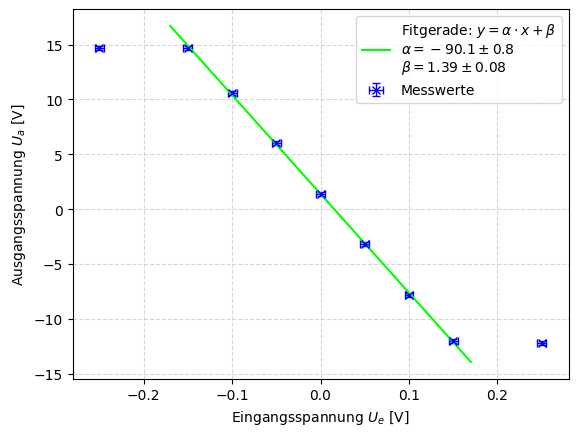

In [7]:
X = np.linspace(-0.17,0.17,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a1_Ue_dc, a1_Ua_dc_274, yerr=a1_dUa_dc_274, xerr=a1_dUe_dc, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'Eingangsspannung $U_e$ [V]')
plt.ylabel(r'Ausgangsspannung $U_a$ [V]')
plt.plot(X, linfit(X, *a1_popt_dc_274), color='lime', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1}$'.format(a1_popt_dc_274[0], np.sqrt(a1_pcov_dc_274[0][0])), 
                          r'$\beta ={:.2f}\pm{:.1}$'.format(a1_popt_dc_274[1], np.sqrt(a1_pcov_dc_274[1][1]))]))
plt.legend()
plt.savefig('./plots/A1-DC274.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((linfit(a1_Ue_dc[1:-1],*a1_popt_dc_274) - a1_Ua_dc_274[1:-1])**2 /a1_dUa_dc_274[1:-1]**2)
dof = len(a1_Ue_dc[1:-1]) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

chi2 = 10.0666839611808
chi2_red = 2.5166709902952
Wahrscheinlichkeit = 4.0 %


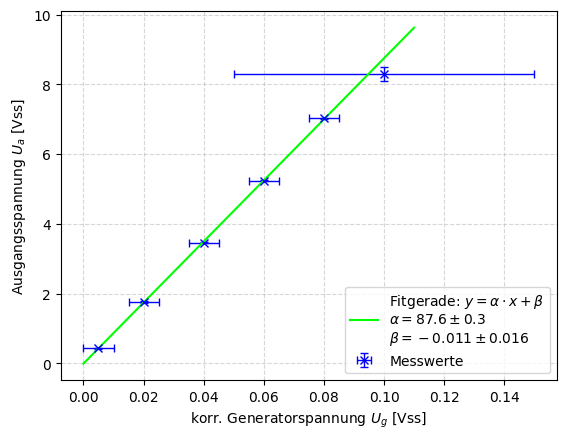

In [8]:
X = np.linspace(0,0.11,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a1_Ug_ac, a1_Ua_ac_274, yerr=a1_dUa_ac_274, xerr=a1_dUg_ac, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'korr. Generatorspannung $U_g$ [Vss]')
plt.ylabel(r'Ausgangsspannung $U_a$ [Vss]')
plt.plot(X, linfit(X, *a1_popt_ac_274), color='lime', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1}$'.format(a1_popt_ac_274[0], np.sqrt(a1_pcov_ac_274[0][0])), 
                          r'$\beta ={:.3f}\pm{:.2}$'.format(a1_popt_ac_274[1], np.sqrt(a1_pcov_ac_274[1][1]))]))
plt.legend()
plt.savefig('./plots/A1-AC274.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((linfit(a1_Ug_ac,*a1_popt_ac_274) - a1_Ua_ac_274)**2 /a1_dUa_ac_274**2)
dof = len(a1_Ug_ac) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

chi2 = 331.3340806461145
chi2_red = 82.83352016152863
Wahrscheinlichkeit = 0.0 %


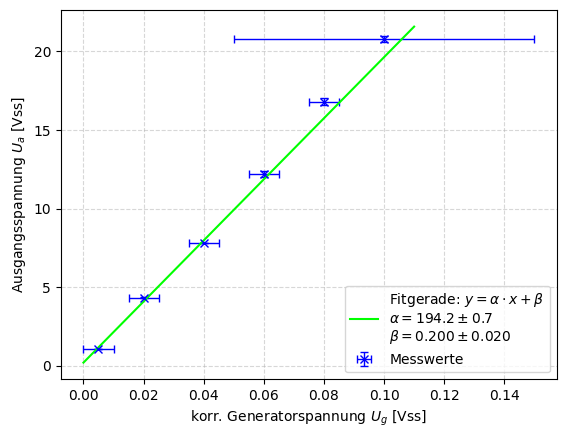

In [9]:
X = np.linspace(0,0.11,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a1_Ug_ac, a1_Ua_ac_680, yerr=a1_dUa_ac_680, xerr=a1_dUg_ac, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
plt.xlabel(r'korr. Generatorspannung $U_g$ [Vss]')
plt.ylabel(r'Ausgangsspannung $U_a$ [Vss]')
plt.plot(X, linfit(X, *a1_popt_ac_680), color='lime', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1}$'.format(a1_popt_ac_680[0], np.sqrt(a1_pcov_ac_680[0][0])), 
                          r'$\beta ={:.3f}\pm{:.3f}$'.format(a1_popt_ac_680[1], np.sqrt(a1_pcov_ac_680[1][1]))]))
plt.legend()
plt.savefig('./plots/A1-AC680.pdf', format='PDF')

#Fitcheck
chi_2 = np.sum((linfit(a1_Ug_ac,*a1_popt_ac_680) - a1_Ua_ac_680)**2 /a1_dUa_ac_680**2)
dof = len(a1_Ug_ac) - 2 #dof:degrees of freedom, Freiheitsgrad
chi2_red = chi_2/dof
print("chi2 =", chi_2)
print("chi2_red =",chi2_red)
prob = round(1-chi2.cdf(chi_2,dof),2)*100
print("Wahrscheinlichkeit =", prob,"%")

In [10]:
#Betriebsverstärkung aus Messung:
a1_V_dc_48 = - a1_popt_dc_48[0]
a1_dV_dc_48 = np.sqrt(a1_pcov_dc_48[0][0])

a1_V_dc_274 = - a1_popt_dc_274[0]
a1_dV_dc_274 = np.sqrt(a1_pcov_dc_274[0][0])

a1_V_ac_274 = a1_popt_ac_274[0]
a1_dV_ac_274 = np.sqrt(a1_pcov_ac_274[0][0])

a1_V_ac_680 = a1_popt_ac_680[0]
a1_dV_ac_680 = np.sqrt(a1_pcov_ac_680[0][0])

In [11]:
print("Betriebsverstärkung Messung DC (48,7kohm) = ({} +/- {})Js".format(a1_V_dc_48, a1_dV_dc_48))
print("Betriebsverstärkung Messung DC (274kohm) = ({} +/- {})Js".format(a1_V_dc_274, a1_dV_dc_274))
print("Betriebsverstärkung Messung AC (274kohm) = ({} +/- {})Js".format(a1_V_ac_274, a1_dV_ac_274))
print("Betriebsverstärkung Messung AC (680kohm) = ({} +/- {})Js".format(a1_V_ac_680, a1_dV_ac_680))

Betriebsverstärkung Messung DC (48,7kohm) = (16.307692308335117 +/- 0.452910817190047)Js
Betriebsverstärkung Messung DC (274kohm) = (90.07142856535128 +/- 0.7559289480227102)Js
Betriebsverstärkung Messung AC (274kohm) = (87.61718257602269 +/- 0.3308273088193697)Js
Betriebsverstärkung Messung AC (680kohm) = (194.22762268436355 +/- 0.7424029428459205)Js


In [12]:
#Theoretische Werte:
a1_Vtheo_48 = 48.7 /3
a1_dVtheo_48 = a1_Vtheo_48 * np.sqrt(0.1**2 + 0.1**2)

a1_Vtheo_274 = 274 /3
a1_dVtheo_274 = a1_Vtheo_274 * np.sqrt(0.1**2 + 0.1**2)

a1_Vtheo_680 = 680 /3
a1_dVtheo_680 = a1_Vtheo_680 * np.sqrt(0.1**2 + 0.1**2)

In [13]:
print("Betriebsverstärkung Theorie (48,7kohm) = ({} +/- {})Js".format(a1_Vtheo_48, a1_dVtheo_48))
print("Betriebsverstärkung Theorie (274kohm) = ({} +/- {})Js".format(a1_Vtheo_274, a1_dVtheo_274))
print("Betriebsverstärkung Theorie (680kohm) = ({} +/- {})Js".format(a1_Vtheo_680, a1_dVtheo_680))

Betriebsverstärkung Theorie (48,7kohm) = (16.233333333333334 +/- 2.2957400162523247)Js
Betriebsverstärkung Theorie (274kohm) = (91.33333333333333 +/- 12.91648386967427)Js
Betriebsverstärkung Theorie (680kohm) = (226.66666666666666 +/- 32.05550741379016)Js


In [14]:
s1 = sigma(a1_Vtheo_48, a1_V_dc_48, a1_dVtheo_48, a1_dV_dc_48, 'Betriebsverstärkung DC (48,7kohm)')
s2 = sigma(a1_Vtheo_274, a1_V_dc_274, a1_dVtheo_274, a1_dV_dc_274, 'Betriebsverstärkung DC (274kohm)')
s3 = sigma(a1_Vtheo_274, a1_V_ac_274, a1_dVtheo_274, a1_dV_ac_274, 'Betriebsverstärkung AC (274kohm)')
s4 = sigma(a1_Vtheo_680, a1_V_ac_680, a1_dVtheo_680, a1_dV_ac_680, 'Betriebsverstärkung AC (680kohm)')

a1_sigmas = np.array([s1,s2,s3,s4])

Sigmaabweichung Betriebsverstärkung DC (48,7kohm) = 0.03177748358209982
Sigmaabweichung Betriebsverstärkung DC (274kohm) = 0.09753035275562749
Sigmaabweichung Betriebsverstärkung AC (274kohm) = 0.28761174232610476
Sigmaabweichung Betriebsverstärkung AC (680kohm) = 1.0116934729827718


# Zu Aufgabe 2

In [15]:
#Einstellungen:
a2_UgI = 0.3e-1 #V
a2_UgII = 0.3e-1
a2_UgIII = 1e-1

a2_RgI = 680e3 #ohm
a2_RgII = 274e3
a2_RgIII = 48.7e3

In [16]:
#Messwerte:
a2_f = np.array([100,300,600,1e3,3e3,6e3,10e3,30e3,60e3,1e5,3e5])

a2_UI = np.array([6.65,6.64,6.64,6.48,5.4,3.8,2.6,1.1,0.7,0.5,0.36])
a2_dUI = np.concatenate([np.full(8, 0.1), np.full(3, 0.02)])

a2_UII = np.array([2.64,2.64,2.64,2.64,2.64,2.4,2,1.1,0.7,0.52,0.4])
a2_dUII = np.concatenate([np.full(8, 0.1), np.full(3, 0.02)])

a2_UIII = np.array([1.63,1.63,1.63,1.63,1.63,1.63,1.61,1.45,1.15,0.85,0.36])
a2_dUIII = np.concatenate([np.full(9, 0.1), np.full(2, 0.02)])

a2_Upara = np.array([1.64,1.64,1.63,1.61,1.47,1.19,0.9,0.39,0.23,0.19,0.11])
a2_dUpara = np.concatenate([np.full(6, 0.1), np.full(5,0.02)])

a2_fhp = np.array([300,600,1e3,3e3,6e3,10e3,13e3,16e3,20e3]) *10**-3 #kHz -> Umrechnung damit fit funktioniert, wird später wieder zurückskaliert
a2_Uhp = np.array([0.49,0.83,1.11,1.55,1.63,1.63,1.63,1.59,1.55])
a2_dUhp = np.concatenate([np.full(2,0.02), np.full(7, 0.1)])

In [17]:
#Fits:
def fit(x,a,b,c):
    return 1/(a * x**b + c)

def fithp(x,a,b,c, bkg):
    return bkg - 1/(a * x**b + c)

In [18]:
popt_UI, pcov_UI = curve_fit(fit, a2_f, a2_UI, sigma=a2_dUI, absolute_sigma=True)
popt_UII, pcov_UII = curve_fit(fit, a2_f, a2_UII, sigma=a2_dUII, absolute_sigma=True)
popt_UIII, pcov_UIII = curve_fit(fit, a2_f, a2_UIII, sigma=a2_dUIII, absolute_sigma=True)

In [19]:
popt_Upara, pcov_Upara = curve_fit(fit, a2_f, a2_Upara, sigma=a2_dUpara, absolute_sigma=True)

In [20]:
popt_Uhp, pcov_Uhp = curve_fit(fithp, a2_fhp, a2_Uhp, sigma=a2_dUhp, absolute_sigma=True, p0=[-1,-1,-1,1], maxfev=10000)
popt_Uhp

array([-0.40711402, -1.90318063, -0.74917067,  0.28094205])

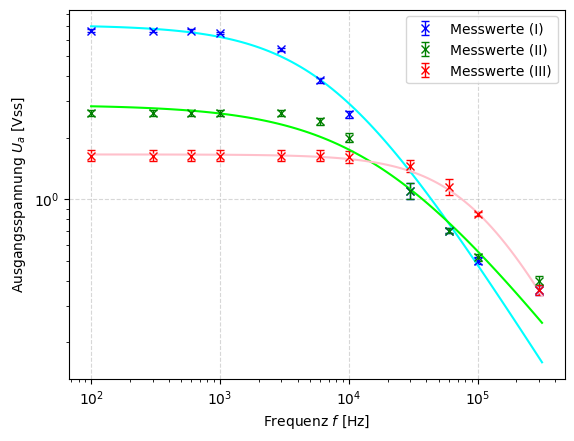

In [21]:
X = np.logspace(2,5.5,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a2_f, a2_UI, yerr=a2_dUI, fmt='x', color='blue', label='Messwerte (I)', capsize=3, lw=1)
plt.errorbar(a2_f, a2_UII, yerr=a2_dUII, fmt='x', color='green', label='Messwerte (II)', capsize=3, lw=1)
plt.errorbar(a2_f, a2_UIII, yerr=a2_dUIII, fmt='x', color='red', label='Messwerte (III)', capsize=3, lw=1)
#plt.plot(a2_f, a2_UI, alpha=0.5, color='cyan')
#plt.plot(a2_f, a2_UII, alpha=0.5, color='lime')
#plt.plot(a2_f, a2_UIII, alpha=0.5, color='pink')
plt.plot(X, fit(X, *popt_UI), color='cyan')
plt.plot(X, fit(X, *popt_UII), color='lime')
plt.plot(X, fit(X, *popt_UIII), color='pink')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Ausgangsspannung $U_a$ [Vss]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('./plots/A2-1.pdf', format='PDF')

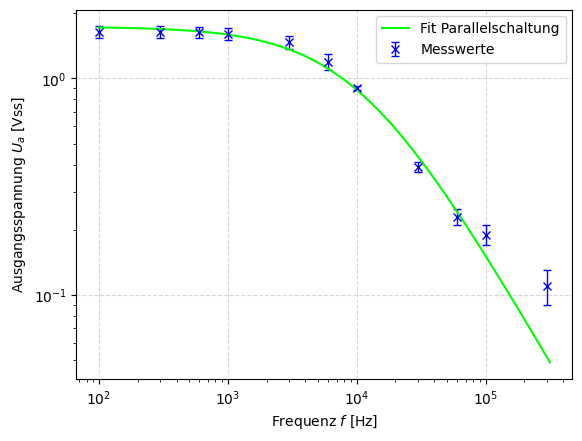

In [22]:
X = np.logspace(2,5.5,100)

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a2_f, a2_Upara, yerr=a2_dUpara, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
#plt.plot(a2_f, a2_Upara, alpha=0.5, color='cyan')
plt.plot(X, fit(X, *popt_Upara), color='lime', label='Fit Parallelschaltung')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Ausgangsspannung $U_a$ [Vss]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('./plots/A2-2.pdf', format='PDF')

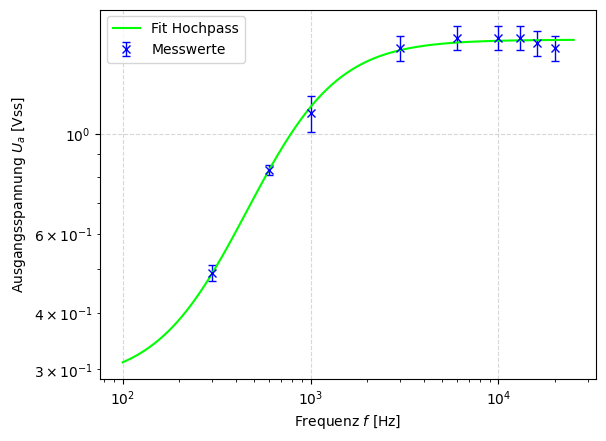

In [23]:
X = np.logspace(2,4.4,100) * 10**-3

plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(a2_fhp*1e3, a2_Uhp, yerr=a2_dUhp, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)
#plt.plot(a2_fhp, a2_Uhp, alpha=0.5, color='cyan')
plt.plot(X*1e3, fithp(X, *popt_Uhp), color='lime', label='Fit Hochpass')


#plt.errorbar(a2_f, a2_Upara, yerr=a2_dUpara, fmt='x', color='orange', label='Messwerte')
#plt.plot(a2_f, a2_Upara, alpha=0.5, color='orange')


plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Ausgangsspannung $U_a$ [Vss]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('./plots/A2-3.pdf', format='PDF')